In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
features = pd.read_csv("/Users/chandlershortlidge/Desktop/Ironhack/DA_FT_Extra_Week10/data/audio_features_clean.csv")

features.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,explicit_False,explicit_True
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,676.00,461.0000,1,-6.746,0,143.0000,0.0322,0.000001,358.0000,715.00,87.917,4,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0.42,166.0000,1,-17.235,1,0.0763,924.0000,0.000006,101.0000,267.00,77.489,4,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,438.00,359.0000,0,-9.734,1,0.0557,0.2100,0.000000,117.0000,0.12,76.332,4,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,266.00,0.0596,0,-18.515,1,0.0363,905.0000,0.000071,132.0000,143.00,181.740,3,1,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,618.00,443.0000,2,-9.681,1,0.0526,469.0000,0.000000,0.0829,167.00,119.949,4,1,0


### try with fewer features

In [24]:
features_core = ['danceability', 'energy', "key", "mode", 'valence', 'tempo', 
                 'acousticness', 'instrumentalness', 'speechiness', 'loudness',
                 'liveness', 'tempo']

X = features[features_core]

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
print("Shape", X_scaled.shape)

Shape (34477, 12)


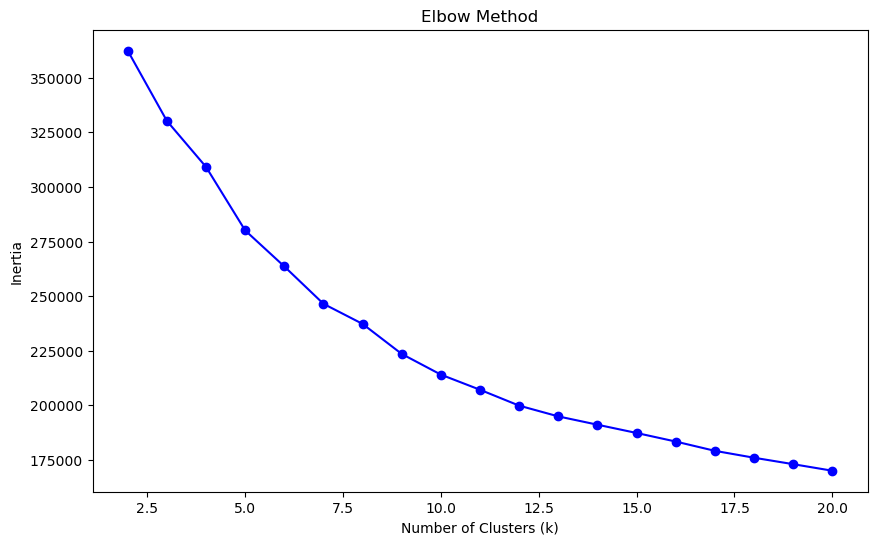

In [27]:
# Find optimal number of clusters using elbow method
inertias = []
K_range = range(2, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

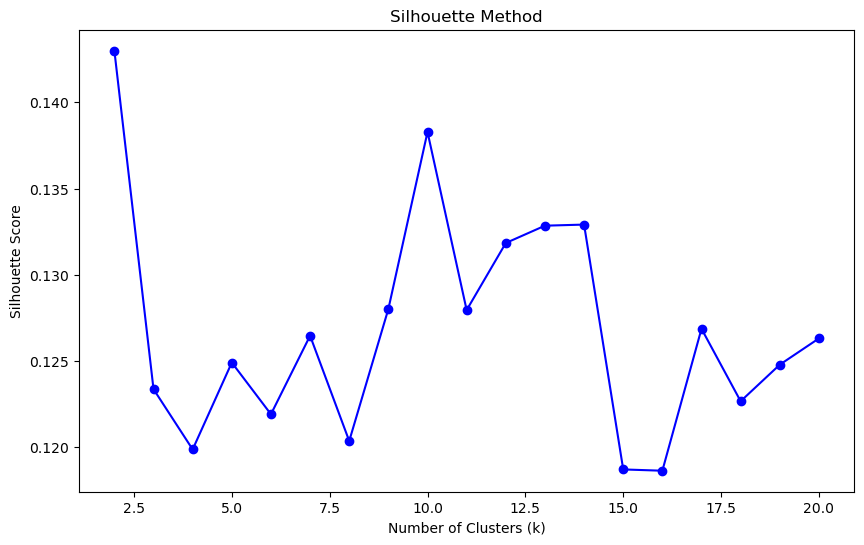

Best k by silhouette: 2 (score: 0.143)


In [28]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 21)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Print best k
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best k by silhouette: {best_k} (score: {max(silhouette_scores):.3f})")

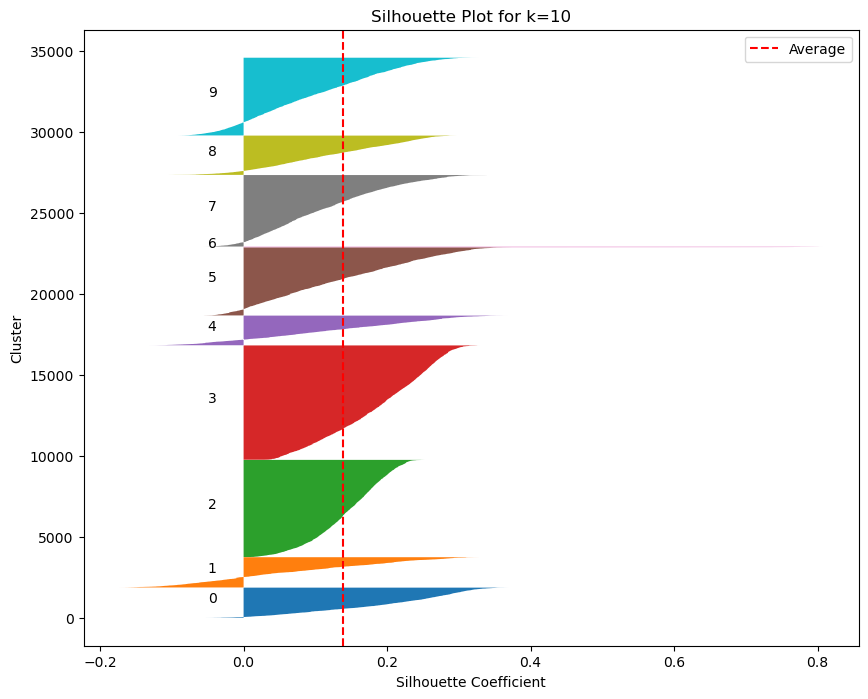

In [30]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Get silhouette score for each sample
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)
silhouette_vals = silhouette_samples(X_scaled, labels)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
y_lower = 10

for i in range(10):
    cluster_silhouette_vals = silhouette_vals[labels == i]
    cluster_silhouette_vals.sort()
    
    y_upper = y_lower + len(cluster_silhouette_vals)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    ax.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10

ax.axvline(x=silhouette_score(X_scaled, labels), color='red', linestyle='--', label='Average')
ax.set_xlabel('Silhouette Coefficient')
ax.set_ylabel('Cluster')
ax.set_title('Silhouette Plot for k=10')
plt.legend()
plt.show()

In [31]:
# Final clustering with k=12
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
features['cluster'] = kmeans.fit_predict(X_scaled)

# Check cluster sizes
print(features['cluster'].value_counts().sort_index())

cluster
0    1858
1    1868
2    5998
3    7054
4    1831
5    4200
6      33
7    4413
8    2425
9    4797
Name: count, dtype: int64


In [32]:
# Look at the average features for each cluster
cluster_profiles = features.groupby('cluster')[features_core].mean()
print(cluster_profiles.round(2))

         danceability  energy   key  mode  valence   tempo  acousticness  \
cluster                                                                    
0              358.33  150.63  4.99  0.63   206.04   99.81        847.15   
1              645.07  610.62  5.88  0.49   531.24  126.80        253.10   
2              604.93  674.37  6.08  0.00   498.54  113.43        123.04   
3              626.06  704.49  4.96  1.00   548.48  111.70        109.59   
4              450.02  672.13  5.23  0.69   407.22  124.00        179.43   
5              399.18  303.57  5.09  0.84   287.72   87.85        587.44   
6              518.99  845.66  5.09  0.67   490.92  128.57         56.41   
7              456.82  275.03  4.79  0.84   299.36  139.18        540.44   
8              569.40  606.94  5.48  0.53   294.77  126.11        104.28   
9              398.99  748.99  5.40  0.72   467.95  162.16         90.12   

         instrumentalness  speechiness  loudness  liveness   tempo  
cluster           

In [33]:
# Sample 5 songs from each cluster
for i in range(10):
    print(f"\n=== CLUSTER {i} ===")
    sample = features[features['cluster'] == i][['track_name', 'artists']].sample(5, random_state=42)
    for _, row in sample.iterrows():
        print(f"  {row['track_name']} - {row['artists']}")


=== CLUSTER 0 ===
  Ember - Tony Anderson
  When Our Wings Are Cut, Can We Still Fly? - Kronos Quartet
  Piano Concerto No. 26 in D Major, K. 537 "Coronation": II. (Larghetto) - Wolfgang Amadeus Mozart;Ingrid Haebler;London Symphony Orchestra;Witold Rowicki
  Rani - MALFNKTION
  Weightless Part 4 - Marconi Union

=== CLUSTER 1 ===
  Vibe Like This (feat. Ty Dolla $ign & Lucky Daye) - SG Lewis;Ty Dolla $ign;Lucky Daye
  Lay Up N’ Chill (feat. A Boogie Wit da Hoodie) - Pink Sweat$;A Boogie Wit da Hoodie
  Barrio patrón - A.N.I.M.A.L.;Richard Kaplan
  Deixe-Me Ir / Tem Café - Ao Vivo - Maneva
  Vegas (From the Original Motion Picture Soundtrack ELVIS) - Doja Cat

=== CLUSTER 2 ===
  Dulce - Los Amigos Invisibles
  Cheirosa - MC Rogerinho
  Counting Stars - OneRepublic
  Transito Lento - Andrés Calamaro
  Women Of The Sun - Hugh Masekela

=== CLUSTER 3 ===
  Sugar - Surf Curse
  Children's Christmas Song - Stereo - The Supremes
  Soulful Christmas - James Brown
  Chori Chori - Alka Yagnik

In [34]:
cluster_labels = {
    0: "Cinematic / Calm",
    1: "Pop / R&B / Hip Hop",
    2: "Latin / Global Pop",
    3: "Holiday",
    4: "Latin Pop / Reggaeton",
    5: "Spiritual / Gospel",
    6: "High-Energy / Aggressive",
    7: "Hard Rock / Anthemic",
    8: "Acoustic Country",
    9: "Lo-Fi / Chill"
}

features['cluster_label'] = features['cluster'].map(cluster_labels)

# Save it
features.to_csv('/Users/chandlershortlidge/Desktop/Ironhack/DA_FT_Extra_Week10/data/clustered_songs.csv', index=False)

In [35]:
print(len(features)) 

34477
